## Convolutional Autoencoder

In [2]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

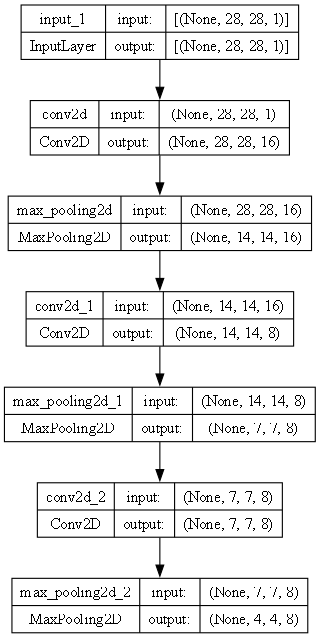

In [11]:
# plot_model autoencoder

from keras.utils import plot_model

plot_model(autoencoder, to_file='CNN_Autoencoder/autoencoder.png',dpi=80, show_shapes=True)
plot_model(encoder, to_file='CNN_Autoencoder/encoder.png',dpi=80, show_shapes=True)

In [3]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [4]:
import tensorflow as tf
import shutil
from keras.callbacks import ModelCheckpoint

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs

# Mac/Linux
# !rm -rf ./logs/

# Windows
shutil.rmtree("./logs", ignore_errors=True)

checkpointCNN = ModelCheckpoint("best_autoencoderCNN", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Define the TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)

callbacks_list = [checkpointCNN, tensorboard_callback]


# Add the TensorBoard callback to the fit method
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks_list) # added callback

# Start TensorBoard
%tensorboard --logdir logs


Epoch 1/50
234/235 [============================>.] - ETA: 0s - loss: 0.2721
Epoch 1: val_loss improved from inf to 0.18019, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 57ms/step - loss: 0.2719 - val_loss: 0.1802
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 0.1604
Epoch 2: val_loss improved from 0.18019 to 0.14613, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 13s 56ms/step - loss: 0.1604 - val_loss: 0.1461
Epoch 3/50
234/235 [============================>.] - ETA: 0s - loss: 0.1403
Epoch 3: val_loss improved from 0.14613 to 0.13390, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 13s 57ms/step - loss: 0.1403 - val_loss: 0.1339
Epoch 4/50
234/235 [============================>.] - ETA: 0s - loss: 0.1308
Epoch 4: val_loss improved from 0.13390 to 0.12594, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1307 - val_loss: 0.1259
Epoch 5/50
234/235 [============================>.] - ETA: 0s - loss: 0.1245
Epoch 5: val_loss improved from 0.12594 to 0.12199, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 57ms/step - loss: 0.1245 - val_loss: 0.1220
Epoch 6/50
234/235 [============================>.] - ETA: 0s - loss: 0.1201
Epoch 6: val_loss improved from 0.12199 to 0.11709, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 13s 57ms/step - loss: 0.1201 - val_loss: 0.1171
Epoch 7/50
234/235 [============================>.] - ETA: 0s - loss: 0.1169
Epoch 7: val_loss improved from 0.11709 to 0.11420, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1169 - val_loss: 0.1142
Epoch 8/50
234/235 [============================>.] - ETA: 0s - loss: 0.1145
Epoch 8: val_loss improved from 0.11420 to 0.11234, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.1145 - val_loss: 0.1123
Epoch 9/50
235/235 [==============================] - ETA: 0s - loss: 0.1124
Epoch 9: val_loss improved from 0.11234 to 0.11044, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1124 - val_loss: 0.1104
Epoch 10/50
234/235 [============================>.] - ETA: 0s - loss: 0.1106
Epoch 10: val_loss improved from 0.11044 to 0.10888, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 13s 57ms/step - loss: 0.1106 - val_loss: 0.1089
Epoch 11/50
234/235 [============================>.] - ETA: 0s - loss: 0.1091
Epoch 11: val_loss improved from 0.10888 to 0.10753, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1091 - val_loss: 0.1075
Epoch 12/50
234/235 [============================>.] - ETA: 0s - loss: 0.1079
Epoch 12: val_loss improved from 0.10753 to 0.10582, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1079 - val_loss: 0.1058
Epoch 13/50
234/235 [============================>.] - ETA: 0s - loss: 0.1066
Epoch 13: val_loss improved from 0.10582 to 0.10487, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1066 - val_loss: 0.1049
Epoch 14/50
234/235 [============================>.] - ETA: 0s - loss: 0.1055
Epoch 14: val_loss improved from 0.10487 to 0.10401, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1055 - val_loss: 0.1040
Epoch 15/50
234/235 [============================>.] - ETA: 0s - loss: 0.1046
Epoch 15: val_loss improved from 0.10401 to 0.10332, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.1046 - val_loss: 0.1033
Epoch 16/50
234/235 [============================>.] - ETA: 0s - loss: 0.1038
Epoch 16: val_loss improved from 0.10332 to 0.10237, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1038 - val_loss: 0.1024
Epoch 17/50
234/235 [============================>.] - ETA: 0s - loss: 0.1031
Epoch 17: val_loss improved from 0.10237 to 0.10168, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1031 - val_loss: 0.1017
Epoch 18/50
234/235 [============================>.] - ETA: 0s - loss: 0.1025
Epoch 18: val_loss improved from 0.10168 to 0.10117, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1025 - val_loss: 0.1012
Epoch 19/50
234/235 [============================>.] - ETA: 0s - loss: 0.1019
Epoch 19: val_loss improved from 0.10117 to 0.10053, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1019 - val_loss: 0.1005
Epoch 20/50
234/235 [============================>.] - ETA: 0s - loss: 0.1014
Epoch 20: val_loss improved from 0.10053 to 0.10008, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1015 - val_loss: 0.1001
Epoch 21/50
234/235 [============================>.] - ETA: 0s - loss: 0.1010
Epoch 21: val_loss improved from 0.10008 to 0.09966, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.1010 - val_loss: 0.0997
Epoch 22/50
234/235 [============================>.] - ETA: 0s - loss: 0.1005
Epoch 22: val_loss improved from 0.09966 to 0.09921, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.1005 - val_loss: 0.0992
Epoch 23/50
235/235 [==============================] - ETA: 0s - loss: 0.1001
Epoch 23: val_loss improved from 0.09921 to 0.09886, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.1001 - val_loss: 0.0989
Epoch 24/50
234/235 [============================>.] - ETA: 0s - loss: 0.0997
Epoch 24: val_loss did not improve from 0.09886
235/235 [==============================] - 13s 57ms/step - loss: 0.0997 - val_loss: 0.0989
Epoch 25/50
234/235 [============================>.] - ETA: 0s - loss: 0.0994
Epoch 25: val_loss improved from 0.09886 to 0.09805, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0994 - val_loss: 0.0980
Epoch 26/50
234/235 [============================>.] - ETA: 0s - loss: 0.0991
Epoch 26: val_loss improved from 0.09805 to 0.09773, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.0991 - val_loss: 0.0977
Epoch 27/50
234/235 [============================>.] - ETA: 0s - loss: 0.0988
Epoch 27: val_loss did not improve from 0.09773
235/235 [==============================] - 14s 58ms/step - loss: 0.0988 - val_loss: 0.0980
Epoch 28/50
234/235 [============================>.] - ETA: 0s - loss: 0.0985
Epoch 28: val_loss improved from 0.09773 to 0.09711, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.0985 - val_loss: 0.0971
Epoch 29/50
234/235 [============================>.] - ETA: 0s - loss: 0.0981
Epoch 29: val_loss did not improve from 0.09711
235/235 [==============================] - 14s 59ms/step - loss: 0.0981 - val_loss: 0.0971
Epoch 30/50
234/235 [============================>.] - ETA: 0s - loss: 0.0979
Epoch 30: val_loss improved from 0.09711 to 0.09658, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0979 - val_loss: 0.0966
Epoch 31/50
234/235 [============================>.] - ETA: 0s - loss: 0.0976
Epoch 31: val_loss did not improve from 0.09658
235/235 [==============================] - 14s 58ms/step - loss: 0.0976 - val_loss: 0.0966
Epoch 32/50
234/235 [============================>.] - ETA: 0s - loss: 0.0974
Epoch 32: val_loss improved from 0.09658 to 0.09651, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0974 - val_loss: 0.0965
Epoch 33/50
234/235 [============================>.] - ETA: 0s - loss: 0.0971
Epoch 33: val_loss improved from 0.09651 to 0.09636, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0970 - val_loss: 0.0964
Epoch 34/50
234/235 [============================>.] - ETA: 0s - loss: 0.0969
Epoch 34: val_loss improved from 0.09636 to 0.09556, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0969 - val_loss: 0.0956
Epoch 35/50
234/235 [============================>.] - ETA: 0s - loss: 0.0966
Epoch 35: val_loss improved from 0.09556 to 0.09534, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 15s 62ms/step - loss: 0.0966 - val_loss: 0.0953
Epoch 36/50
234/235 [============================>.] - ETA: 0s - loss: 0.0964
Epoch 36: val_loss did not improve from 0.09534
235/235 [==============================] - 14s 58ms/step - loss: 0.0964 - val_loss: 0.0959
Epoch 37/50
234/235 [============================>.] - ETA: 0s - loss: 0.0962
Epoch 37: val_loss improved from 0.09534 to 0.09494, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0962 - val_loss: 0.0949
Epoch 38/50
234/235 [============================>.] - ETA: 0s - loss: 0.0959
Epoch 38: val_loss did not improve from 0.09494
235/235 [==============================] - 14s 58ms/step - loss: 0.0959 - val_loss: 0.0951
Epoch 39/50
234/235 [============================>.] - ETA: 0s - loss: 0.0957
Epoch 39: val_loss improved from 0.09494 to 0.09457, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0957 - val_loss: 0.0946
Epoch 40/50
234/235 [============================>.] - ETA: 0s - loss: 0.0956
Epoch 40: val_loss improved from 0.09457 to 0.09437, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0956 - val_loss: 0.0944
Epoch 41/50
234/235 [============================>.] - ETA: 0s - loss: 0.0953
Epoch 41: val_loss improved from 0.09437 to 0.09409, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 15s 62ms/step - loss: 0.0953 - val_loss: 0.0941
Epoch 42/50
234/235 [============================>.] - ETA: 0s - loss: 0.0951
Epoch 42: val_loss improved from 0.09409 to 0.09409, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0951 - val_loss: 0.0941
Epoch 43/50
234/235 [============================>.] - ETA: 0s - loss: 0.0950
Epoch 43: val_loss did not improve from 0.09409
235/235 [==============================] - 14s 59ms/step - loss: 0.0950 - val_loss: 0.0941
Epoch 44/50
234/235 [============================>.] - ETA: 0s - loss: 0.0948
Epoch 44: val_loss improved from 0.09409 to 0.09354, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0948 - val_loss: 0.0935
Epoch 45/50
234/235 [============================>.] - ETA: 0s - loss: 0.0946
Epoch 45: val_loss did not improve from 0.09354
235/235 [==============================] - 14s 58ms/step - loss: 0.0946 - val_loss: 0.0936
Epoch 46/50
234/235 [============================>.] - ETA: 0s - loss: 0.0945
Epoch 46: val_loss improved from 0.09354 to 0.09342, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0945 - val_loss: 0.0934
Epoch 47/50
234/235 [============================>.] - ETA: 0s - loss: 0.0943
Epoch 47: val_loss improved from 0.09342 to 0.09317, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0943 - val_loss: 0.0932
Epoch 48/50
234/235 [============================>.] - ETA: 0s - loss: 0.0941
Epoch 48: val_loss did not improve from 0.09317
235/235 [==============================] - 14s 58ms/step - loss: 0.0941 - val_loss: 0.0945
Epoch 49/50
234/235 [============================>.] - ETA: 0s - loss: 0.0941
Epoch 49: val_loss improved from 0.09317 to 0.09290, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0941 - val_loss: 0.0929
Epoch 50/50
234/235 [============================>.] - ETA: 0s - loss: 0.0938
Epoch 50: val_loss improved from 0.09290 to 0.09274, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0938 - val_loss: 0.0927


Reusing TensorBoard on port 6006 (pid 35756), started 3:54:53 ago. (Use '!kill 35756' to kill it.)

In [5]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 2s 5ms/step


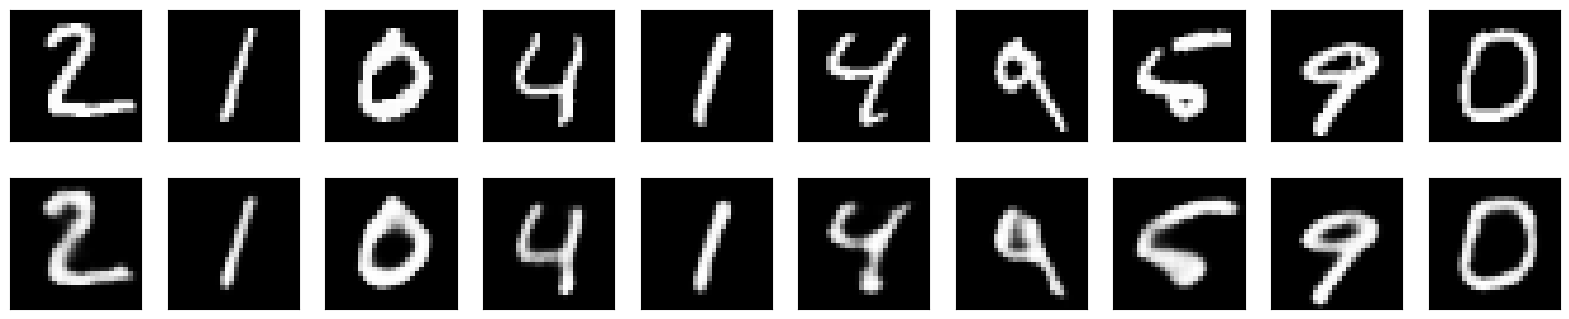

In [6]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


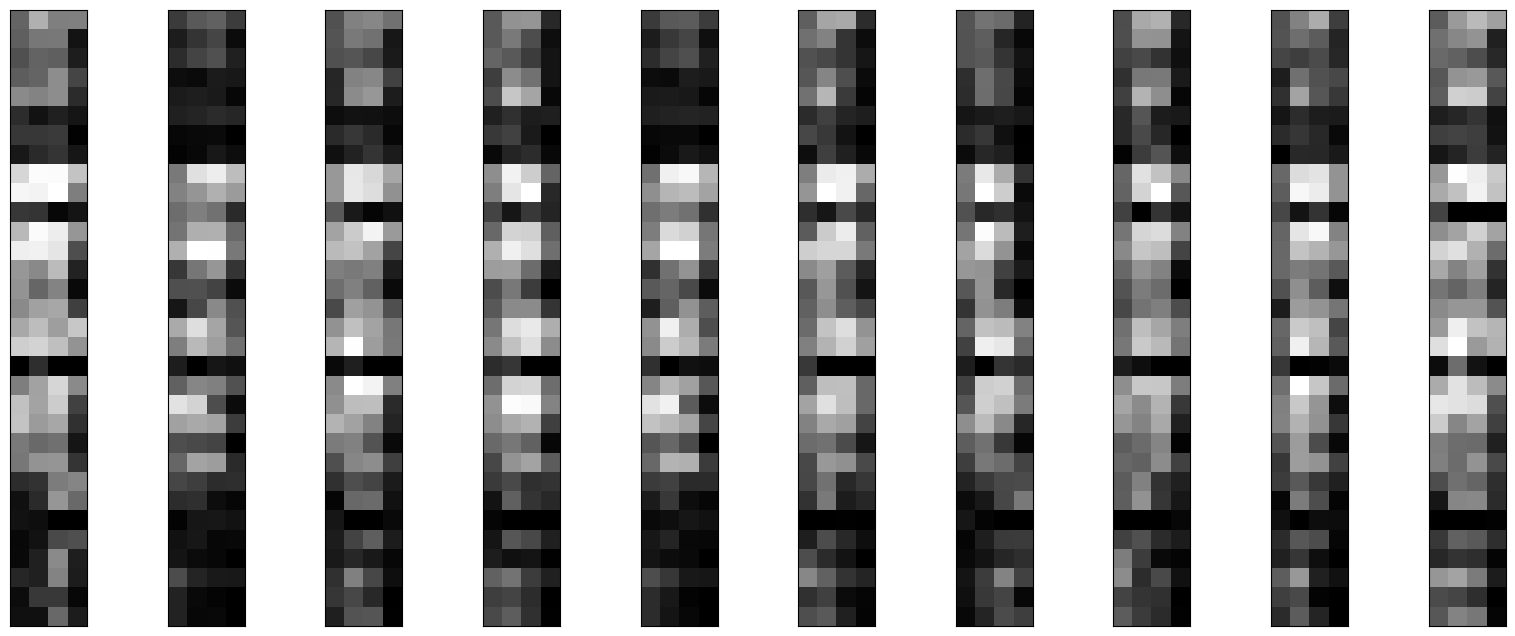

In [8]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()